In [25]:
import pandas as pd
import numpy as np

In [26]:
data=pd.read_csv("CARS.csv")

In [27]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [28]:
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [30]:
data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

Let's check if there is missing data

In [31]:
data.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


Let's check if there are any repeating values

In [32]:
data.duplicated().any()

np.True_

In [33]:
# How many repeating lines are there?
data.duplicated().sum()

np.int64(763)

In [34]:
# List duplicate rows
data[data.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
13,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
14,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
15,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
16,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
17,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4307,Mahindra Xylo H4,2019,599000,15000,Diesel,Individual,Manual,Third Owner
4308,Maruti Alto 800 LXI,2018,200000,35000,Petrol,Individual,Manual,First Owner
4309,Datsun GO Plus T,2017,350000,10171,Petrol,Dealer,Manual,First Owner
4310,Renault Duster 110PS Diesel RxL,2015,465000,41123,Diesel,Dealer,Manual,First Owner


In [35]:
# this code indicates that how many "unique" data points are repeating.
data[data.duplicated()].drop_duplicates().shape[0]

526

Therefore, let's get rid of repetitive values.

In [36]:
data.drop_duplicates(inplace=True)

In [37]:
print(f"Current data shape : {data.shape}")

Current data shape : (3577, 8)


In [38]:
data["fuel"].value_counts()

,count
fuel,
Diesel,1800
Petrol,1717
CNG,37
LPG,22
Electric,1


In [39]:
data["seller_type"].value_counts()

,count
seller_type,
Individual,2832
Dealer,712
Trustmark Dealer,33


In [40]:
data["transmission"].value_counts()

,count
transmission,
Manual,3265
Automatic,312


In [41]:
data["owner"].value_counts()

,count
owner,
First Owner,2218
Second Owner,978
Third Owner,289
Fourth & Above Owner,75
Test Drive Car,17


I think the selling_price currency is Indian Rupee
* So I want to change it to US Dollar.
* 1 Indian Rupee = 0,011 USD (11.16.2025)

In [42]:
data["selling_price"]=data["selling_price"]*0.011
data["selling_price"]=data["selling_price"].astype("int")

Also let's convert year to age

This dataset is from 2020 or 2021.

In [43]:
data["year"]=2021-data["year"]
data.rename(columns={"year": "age"}, inplace=True)

Let's keep explore the data

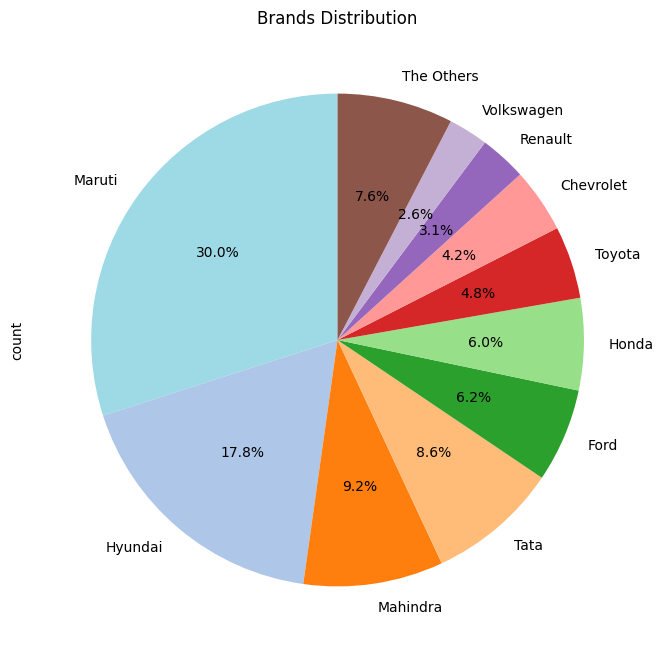

In [44]:
import matplotlib.pyplot as plt
brands = data['name'].str.split().str[0].tolist()
brand_counts = pd.Series(brands).value_counts()

threshold = 0.02 * brand_counts.sum()
large_brands = brand_counts[brand_counts >= threshold]
small_brands = brand_counts[brand_counts < threshold]

brand_counts_cleaned = large_brands.copy()
brand_counts_cleaned['The Others'] = small_brands.sum()

import random

colors = list(plt.cm.tab20.colors)
colors.pop(0)
colors.insert(0, random.choice(colors))

plt.figure(figsize=(8,8))
brand_counts_cleaned.plot(kind='pie',autopct='%1.1f%%',startangle=90,colors=colors)
plt.title("Brands Distribution")
plt.show()


In [45]:
data=data.astype({
    'fuel': 'category',
    'seller_type': 'category',
    'transmission': 'category',
    'owner': 'category'
})

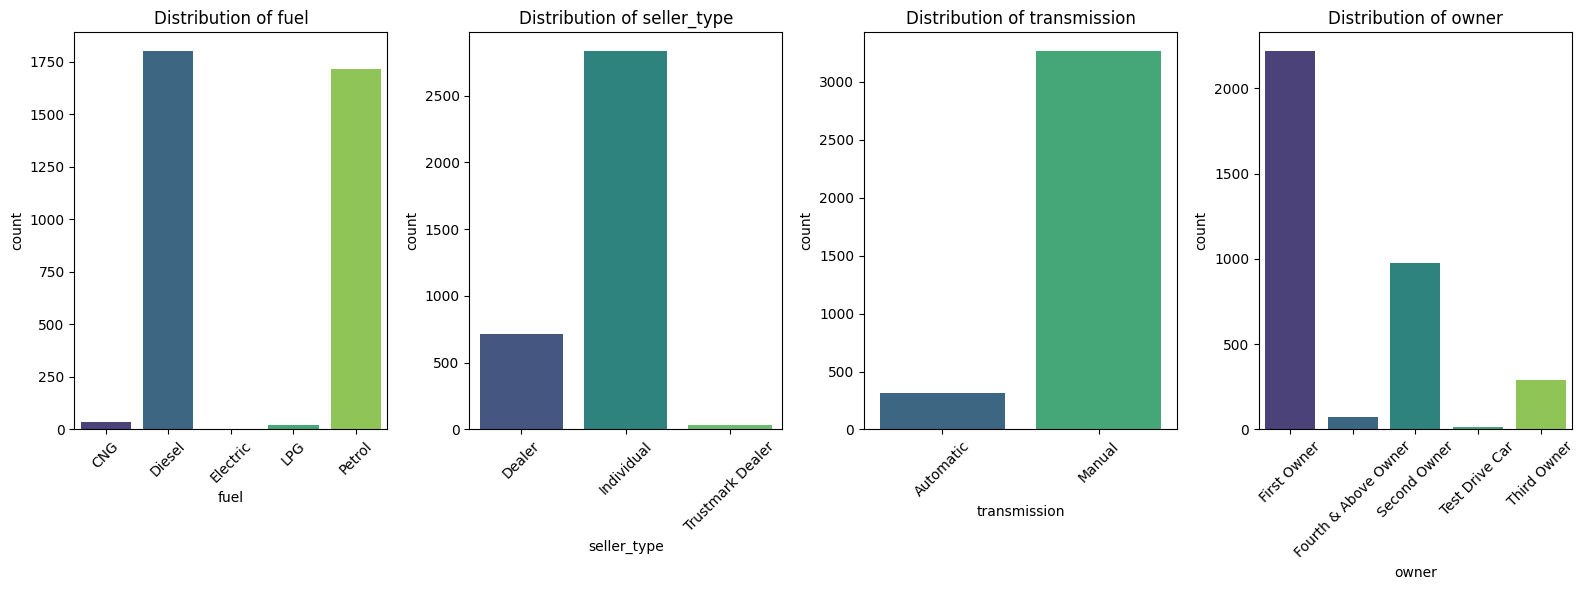

In [46]:
import seaborn as sns
cat_cols = data.select_dtypes(include=['category']).columns
plt.figure(figsize=(16, 6))

for i, column in enumerate(cat_cols, 1):
    plt.subplot(1, len(cat_cols), i)
    sns.countplot(data=data,hue=column, palette='viridis',x=column)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


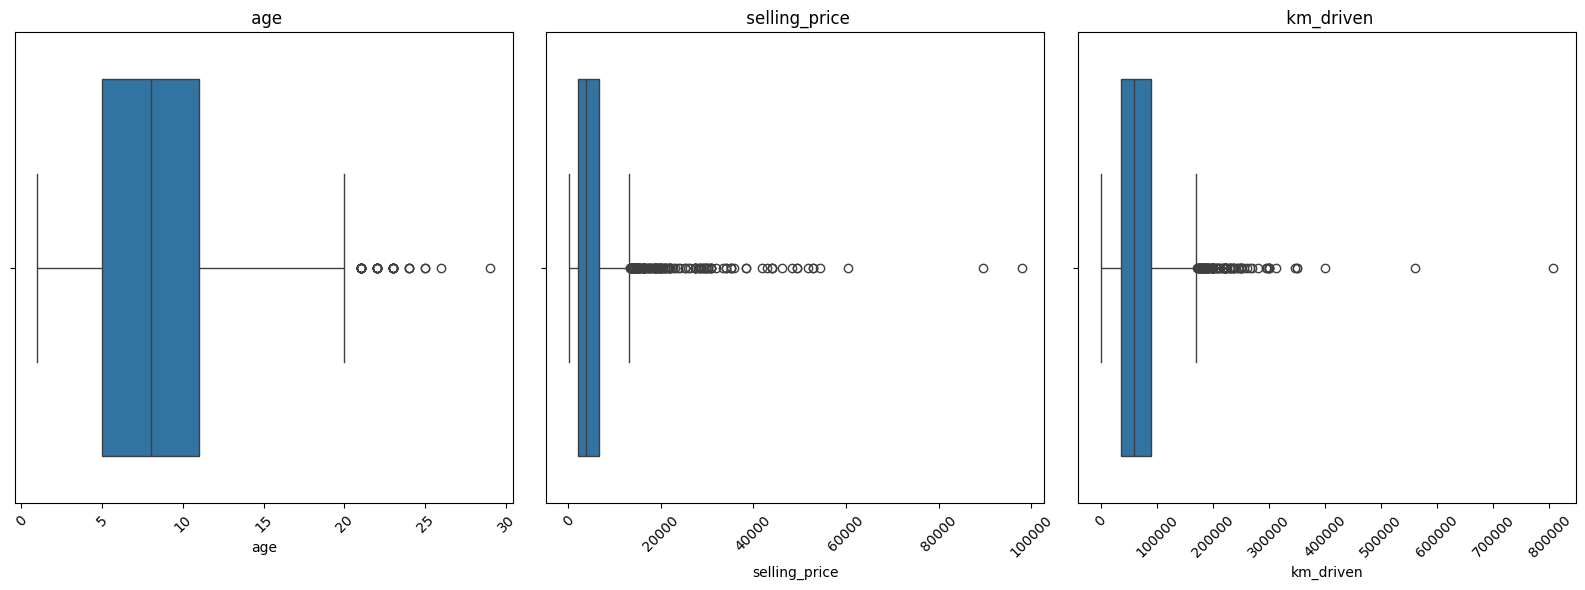

In [47]:
numeric_cols = data.select_dtypes(include=np.number).columns
plt.figure(figsize=(16, 6))

for i, column in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.boxplot(data=data, x=column)
    plt.title(f" {column}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

* Selling Price (Target): The distribution is highly right-skewed with a significant number of outliers in the high-price range. This indicates that while most transactions occur at lower price points, a few luxury entries could bias the model.
* Age: Most vehicles are concentrated between 5 and 12 years old, with a median age of around 8. The distribution is relatively more stable compared to other features.
* KM Driven: Similar to price, this feature shows extreme outliers (e.g., vehicles above 200,000 km). These extreme points suggest the need for outlier treatment to prevent the model from being skewed by high-mileage outliers.

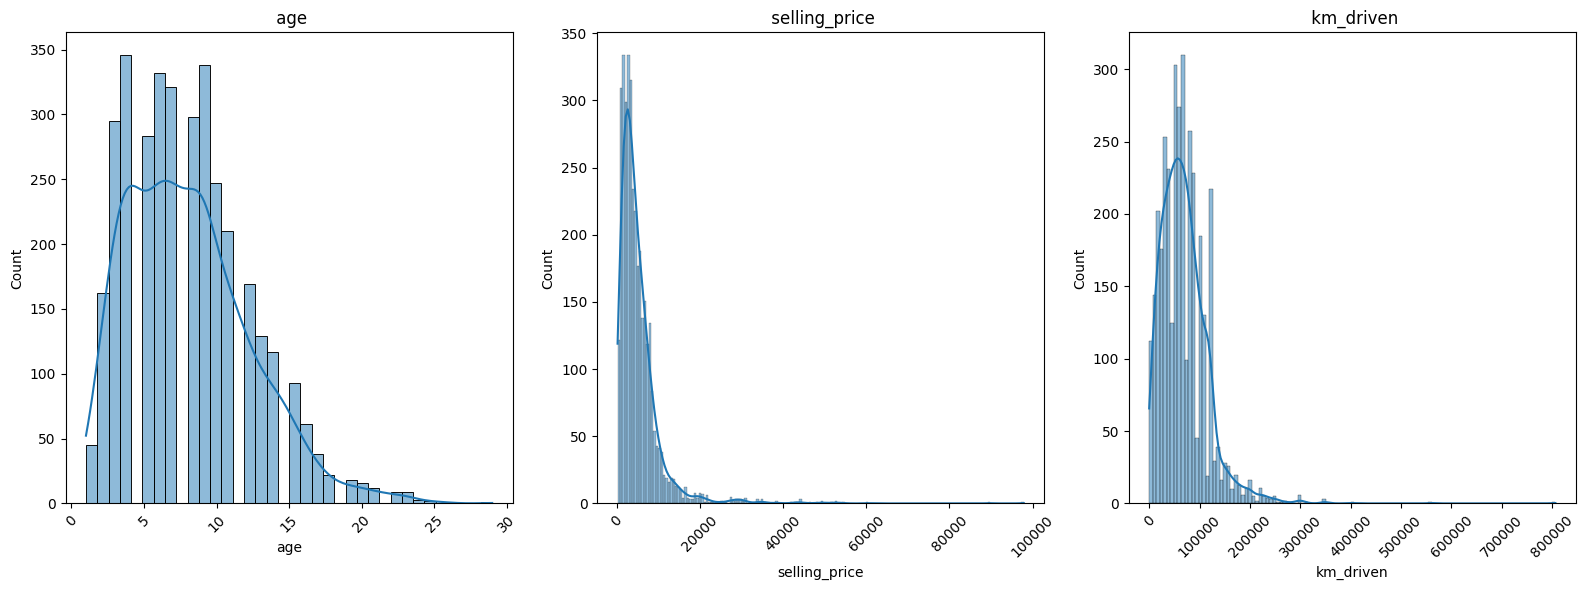

In [48]:
plt.figure(figsize=(16, 6))
for i, column in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.histplot(data=data, x=column, kde=True)
    plt.title(f" {column}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Selling Price (Target): Exhibits a severe positive skew (right-skewed). The long tail extending toward 100,000 confirms that the majority of the market consists of budget-friendly vehicles, while luxury listings are rare. This reinforces the decision to use Log Transformation to normalize the target for linear models.

Age: Shows a multi-modal distribution with peaks around 4, 7, and 9 years. This suggests distinct "waves" of car models entering the second-hand market. The distribution is the most "normal-like" among the features but still tapers off after 15 years.

KM Driven: Highly concentrated in the 50,000–100,000 km range. The sharp drop-off after 150,000 km indicates that high-mileage cars are less frequent in this dataset, which may require RobustScaler to handle the influence of the long tail on the right.

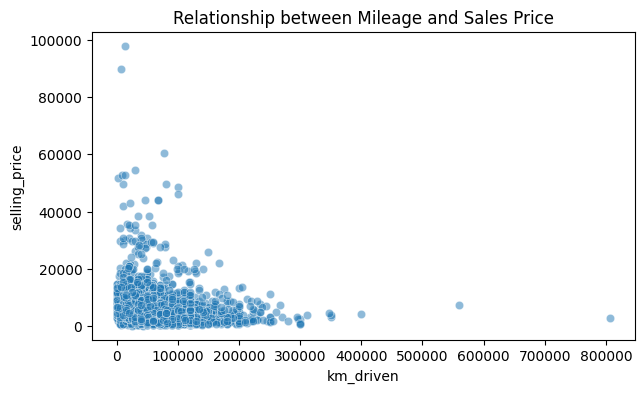

In [49]:
plt.figure(figsize=(7,4))
sns.scatterplot(data=data, x='km_driven', y='selling_price', alpha=0.5)
plt.title('Relationship between Mileage and Sales Price')
plt.show()

Vehicles with lower mileage command significantly higher prices, while the price tends to plateau as mileage increases beyond 200,000 km.


The plot highlights several high-mileage outliers (e.g., above 500,000 km) that maintain a low price point, confirming the need for specialized handling to prevent these extremes from skewing the model's trendline.

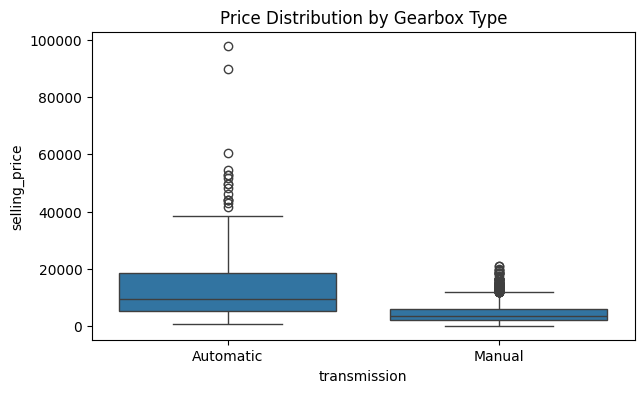

In [50]:
plt.figure(figsize=(7,4))
sns.boxplot(data=data, x='transmission', y='selling_price')
plt.title('Price Distribution by Gearbox Type')
plt.show()

There is a clear and substantial price gap between transmission types. Automatic vehicles command a much higher median price and exhibit a wider interquartile range (IQR).


Both categories show high-price outliers, but the extremes in the "Automatic" category reach nearly double the maximums of the "Manual" group.

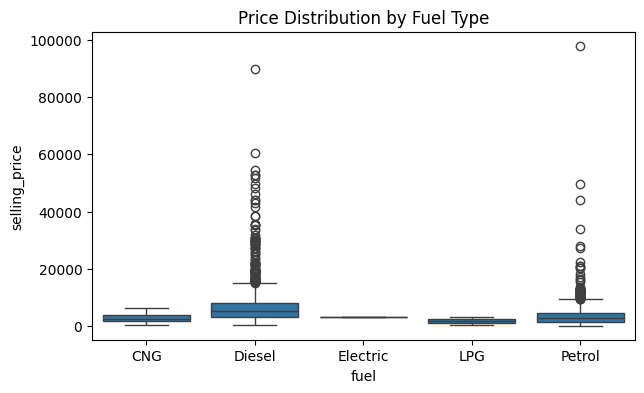

In [51]:
plt.figure(figsize=(7,4))
sns.boxplot(data=data, x='fuel', y='selling_price')
plt.title('Price Distribution by Fuel Type')
plt.show()

The type of fuel used has a massive impact on the car's price.

Diesel cars are generally the most expensive ones in this dataset.

Most petrol cars are cheaper, but there are some very expensive "luxury" exceptions.

LPG and CNG cars are always at the bottom of the price list.

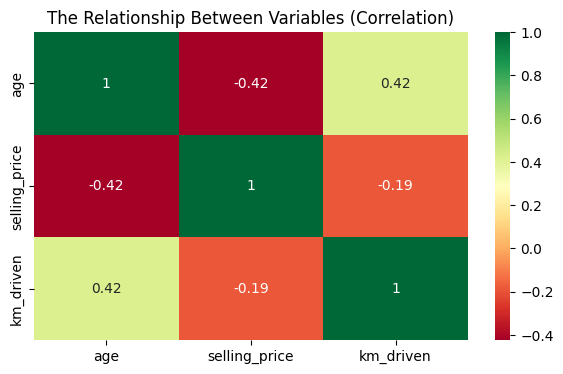

In [52]:
plt.figure(figsize=(7,4))
sns.heatmap(data.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='RdYlGn')
plt.title('The Relationship Between Variables (Correlation)')
plt.show()

Age has the strongest impact on price (-0.42). It’s the most important number here.

Mileage matters (-0.19), but age is twice as important for the price.

The 0.42 between age and mileage is just expected; old cars have more miles.

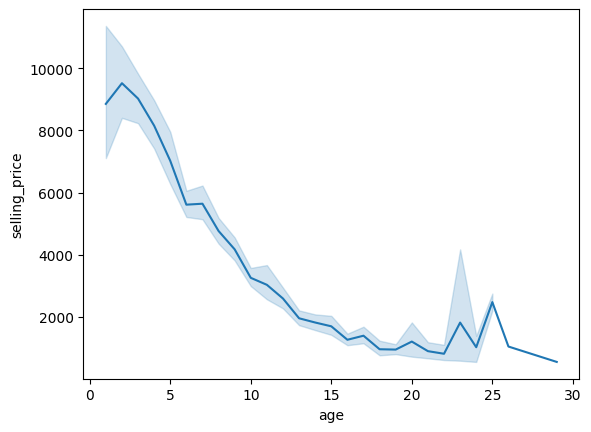

In [53]:
sns.lineplot(x=data["age"],y=data["selling_price"])
plt.show()

The graph shows a sharp and steady decrease in price as the vehicle gets older.

The steepest price drop happens in the first 10 years, which is the most critical period for car value.

After 15-20 years, the price flattens out at a very low level, as these cars reach their minimum market value.

This trend perfectly explains the -0.42 correlation we saw earlier; age is the biggest enemy of the price.

In [54]:
df=data.copy()

Let's handle the outliers in "age" and "km_driven" columns

In [55]:
for col in ['km_driven', 'age']:
    q1,q3=df[col].quantile([0.25,0.75])
    iqr=q3-q1
    low, up= q1-1.5*iqr, q3+1.5*iqr
    df[col]=df[col].clip(low, up)

In [56]:
Up=df['selling_price'].quantile(0.99)   # selling price ın uç noktalarını kırpmak + sadece km ile age ayıklamak en iyi skoru verdi
Low=df['selling_price'].quantile(0.01)
df=df[(df['selling_price']>=Low) & (df['selling_price']<=Up)]

I used IQR to remove statistical biases in the independent variables (age, km_driven); however, in the dependent variable (Selling Price), to avoid losing too much of the real market data and to remove only the most extreme noise, I preferred the more flexible Percentage (1% - 99%) method

* Also these extremely high or low values in "selling_price", which is our dependent variable, ​​can cause regression models (especially loss functions like MSE or MAE) to over-focus on these extreme values ​​while trying to minimize error.

In [57]:
df['brand'] = df['name'].apply(lambda x: x.split()[0])

I performed feature extraction by isolating the first word from the name column to create a new brand variable. This simplifies the high-cardinality 'name' column into categorical brand data, helping the model capture general price trends associated with specific manufacturers rather than being overwhelmed by unique model titles.

In [58]:
df['log_km_driven'] = np.log1p(df['km_driven'])

I applied a log transformation to the km_driven feature to address its right-skewed distribution and high variance. Generally this scaling technique normalizes the distribution and prevents extreme mileage values from disproportionately influencing the model's predictions.

* But in this case I didn't get what I want

* You can see the difference in "km_driven" variable after removing the outliers and applying log transform:

Summary stats after cleaning outliers in 'km_driven' column:
count    3506.000000
mean       10.867254
std         0.875680
min         0.693147
25%        10.532230
50%        11.018646
75%        11.407576
max        12.049425
Name: log_km_driven, dtype: float64


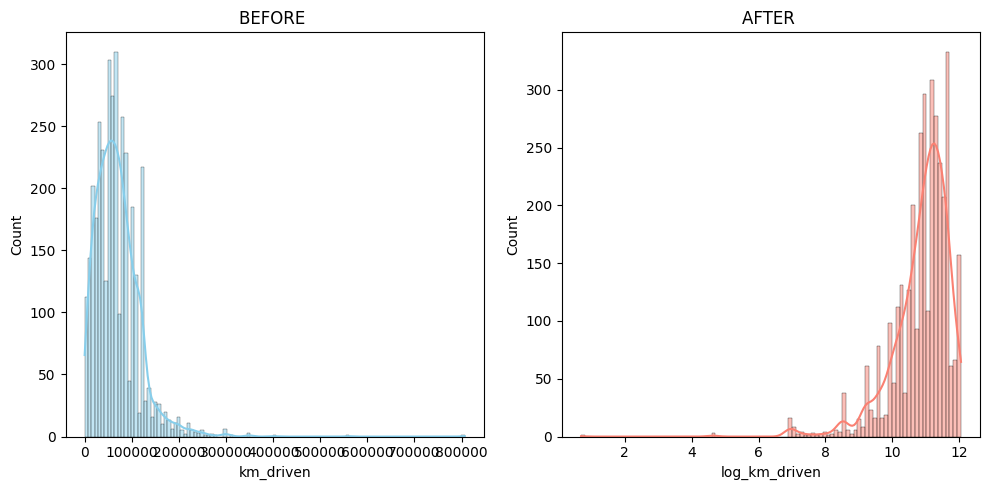

In [59]:
print(f"Summary stats after cleaning outliers in 'km_driven' column:\n{df["log_km_driven"].describe()}")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(data["km_driven"], kde=True,color='skyblue', ax=axes[0])
axes[0].set_title('BEFORE ')
#axes[0].set_xlabel('km_driven')
#axes[0].set_ylabel('count')

sns.histplot(df["log_km_driven"], kde=True, color='salmon', ax=axes[1])
axes[1].set_title('AFTER ')
#axes[1].set_xlabel('log_km_driven')
#axes[1].set_ylabel('count')

plt.tight_layout()
plt.show()

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['km_driven_scaled'] = scaler.fit_transform(df[['km_driven']])

Since the log transformation caused left-skewness, it was discarded. Instead, StandardScaler was applied to km_driven to normalize its range. This ensures the Linear Regression model calculates coefficients more effectively and optimizes the training process

I won't apply log transform to the "age" column. Because;

* After removing outliers using the IQR method, the fact that the mean (7.96) and median (8.00) are nearly identical indicates that the variable now follows a more symmetric distribution than before. So, a log transformation is not necessary because the significant right-skewness it aims to correct has been addressed, and the remaining data range (1 to 20) is too narrow to require such scaling.

Summary stats after cleaning outliers in 'age' column:
count    3506.000000
mean        7.962065
std         4.070140
min         1.000000
25%         5.000000
50%         8.000000
75%        10.750000
max        20.000000
Name: age, dtype: float64


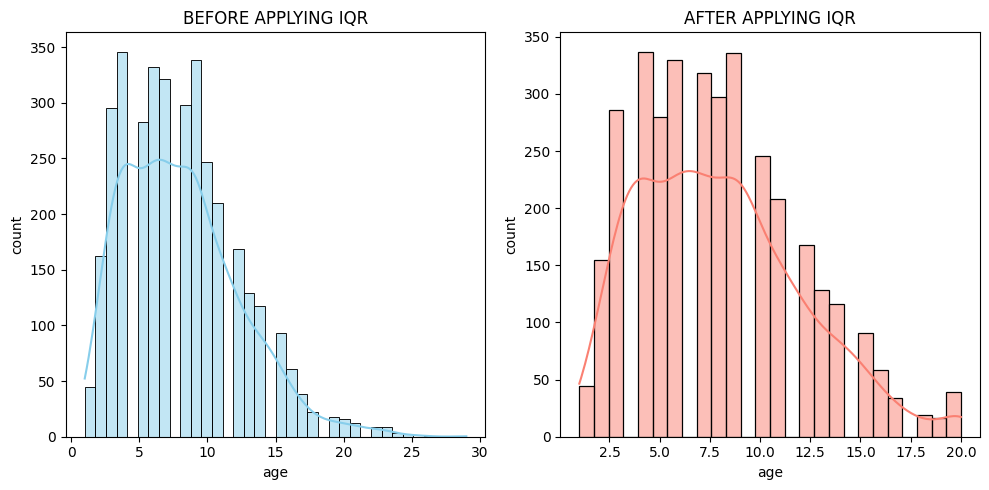

In [61]:
print(f"Summary stats after cleaning outliers in 'age' column:\n{df["age"].describe()}")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(data["age"], kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('BEFORE APPLYING IQR')
axes[0].set_xlabel('age')
axes[0].set_ylabel('count')

sns.histplot(df["age"], kde=True, color='salmon', ax=axes[1])
axes[1].set_title('AFTER APPLYING IQR')
axes[1].set_xlabel('age')
axes[1].set_ylabel('count')

plt.tight_layout()
plt.show()

Let's build a linear regression model:

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [63]:
df.drop([ "name","log_km_driven","km_driven"], axis=1, inplace=True)
df = pd.get_dummies(
    df,
    columns=['fuel', 'seller_type', 'transmission', 'owner',"brand"],
    drop_first=True
)
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)

In [64]:
X = df.drop(columns='selling_price')
y_real = df['selling_price']
y_log = np.log1p(df['selling_price'])

Log transformation is used to normalize right-skewed price data, stabilize variance (homoscedasticity), and reduce the impact of outliers. It converts multiplicative relationships into linear ones, allowing the linear regression model to make more accurate and stable predictions.
* The np.log1p function calculates log(1+x), which is numerically stable and avoids errors if the data contains zero values.

In [65]:
X_train, X_test, y_train_real, y_test_real, y_train_log, y_test_log = train_test_split(
    X, y_real, y_log, test_size=0.2, random_state=42
)

This step uses a single train–test split to ensure a fair and consistent comparison across multiple models.
The input features (X) are kept identical for all models, while different versions of the target variable (y) are created:

log(y) for linear models like Linear Regression

raw y for tree-based models like Random Forest and Gradient Boosting

This approach ensures:

No data leakage

Fair model comparison

Performance differences reflect model behavior, not data splits

In [66]:
reg = LinearRegression()
reg.fit(X_train, y_train_log)

y_pred_log=reg.predict(X_test)
y_pred_actual = np.expm1(y_pred_log)

In [67]:
print("R2 score with log transform \non dependent variable:\n")
print(f"R2 Score : {r2_score(y_test_real, y_pred_actual)}")
print(f"Mae : {mean_absolute_error(y_test_real, y_pred_actual)}")
print(f"Rmse : {np.sqrt(mean_squared_error(y_test_real, y_pred_actual))}")

R2 score with log transform 
on dependent variable:

R2 Score : 0.7428683462976492
Mae : 1295.616049186062
Rmse : 1969.9820908052218


In [68]:
reg_2=LinearRegression()
reg_2.fit(X_train, y_train_real)
y_pred_2=reg_2.predict(X_test)

In [69]:
print("R2 score without log transform \non dependent variable:\n")
print(f"R2 Score : {r2_score(y_test_real, y_pred_2)}")
print(f"Mae : {mean_absolute_error(y_test_real, y_pred_2)}")
print(f"Rmse : {np.sqrt(mean_squared_error(y_test_real, y_pred_2))}")

R2 score without log transform 
on dependent variable:

R2 Score : 0.6954515063890434
Mae : 1492.017244864106
Rmse : 2143.9405296136547


See the difference? This is exactly why I use log transformation. By normalizing the skewed price data and stabilizing the variance, the R2 Score increased from 0.69 to 0.74, while error metrics (MAE and RMSE) significantly decreased. Log transformation helped the linear regression model better capture the underlying patterns by making the data more "linear" and reducing the distorting effect of high-priced outliers.

# HOWEVER:

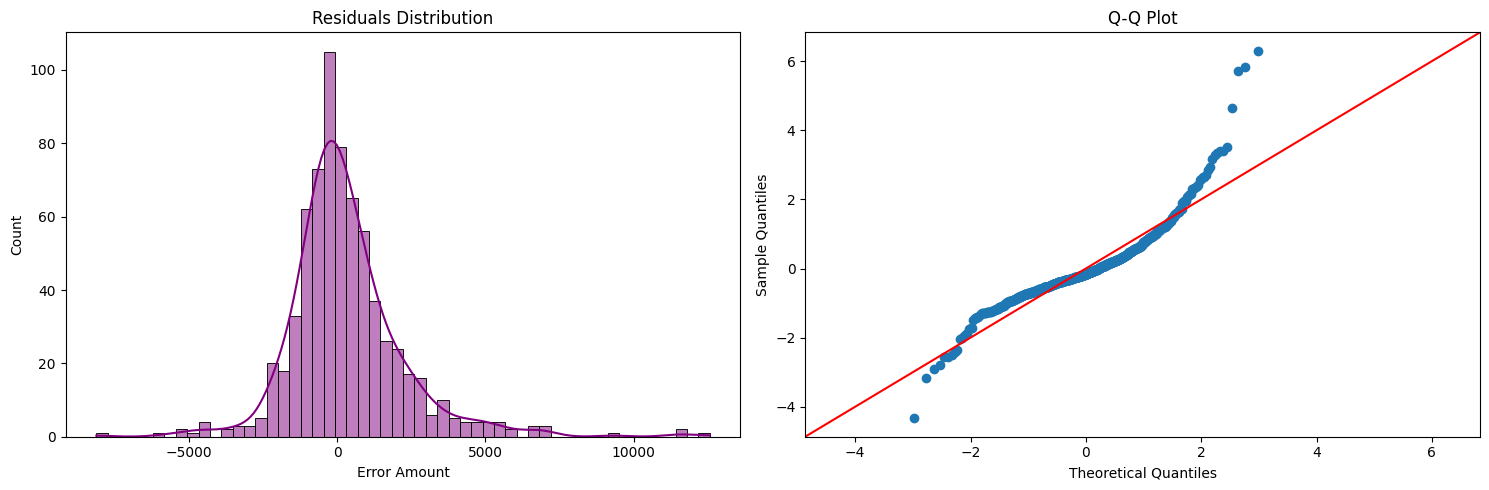

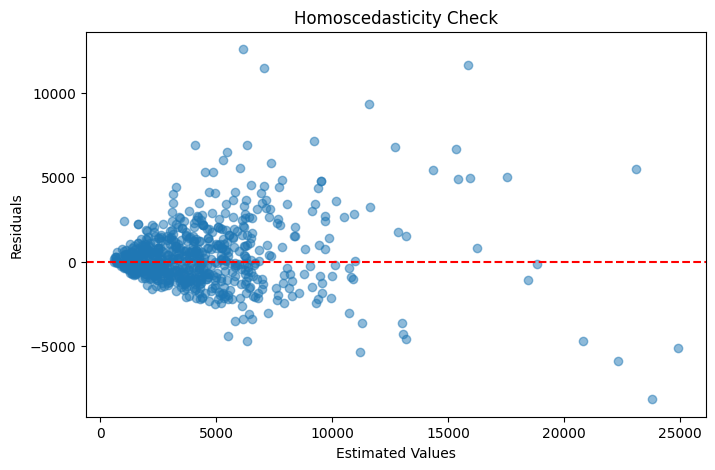

In [70]:
import statsmodels.api as sm

residuals = y_test_real - y_pred_actual
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(residuals, kde=True, ax=ax[0], color='purple')
ax[0].set_title('Residuals Distribution')
ax[0].set_xlabel('Error Amount')

#     graph on the right: Q-Q Plot
sm.qqplot(residuals, line='45', fit=True, ax=ax[1])
ax[1].set_title('Q-Q Plot')

plt.tight_layout()
plt.show()

#    graph on the bottom: scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(y_pred_actual, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Homoscedasticity Check')
plt.xlabel('Estimated Values')
plt.ylabel('Residuals')
plt.show()

Upon analyzing the regression plots and performance metrics, it becomes evident that the R² score of 0.74 is constrained by the violation of key statistical assumptions inherent to linear regression models

Heteroscedasticity Issues: In the "Homoscedasticity Check" plot, the residuals form a funnel shape rather than a random cloud. This indicates that the error variance is not constant; as the estimated values increase, the prediction errors grow larger. Linear regression assumes constant variance (Homoscedasticity).

Non-Normal Residuals: The "Residuals Distribution" and "Q-Q Plot" show significant deviations from the normal distribution, especially at the tails. Since the residuals don't follow the red line perfectly in the Q-Q plot, the model is failing to capture some underlying patterns in the data.

Non-Linearity: The systematic pattern in the residuals suggests that the relationship between your features and the selling price isn't purely linear. This is why a simple linear model peaks at a 0.74 R2 score.